Немного полезных функций

Загрузка данных из файла. Тут две полезные конструкции. 
Первая, это построчное чтение реализованное с помощью
~~~
for line in open(path+'/movies.dat'):
~~~
Вторая -- функция split(), позволяющая разделить строку, по символу или последовательности символов в качестве разделителя.


In [26]:
#Чтение данных

def loadMovieLens1M(path='./ml-1m'):
# Получить названия фильмов
    movies={}
    for line in open(path+'/movies.dat'):
        (id,title)=line.split('::')[0:2] #при желании тут можно добавить чтение жанров.
        movies[id]=title
# Загрузить данные
    prefs={}
    for line in open(path+'/ratings.dat'):
        (user,movieid,rating,ts)=line.split('::')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [27]:
%%time
critics = loadMovieLens1M()

Wall time: 2.16 s


Тестовая и обучающая выборки.
Рассмотрим выбор или не выбор элемента с заданной вероятностью, для этого нам понадобится модуль random и функция random(). Последняя возвращает случайное число равномерно распределенное в диапазоне от 0 до 1. Этим удобно пользоваться, чтобы получить случайное событие с вероятностью \alpha достаточно использовать конструкцию 
~~~
if random()<alpha:
~~~

Функция seed() инициализирует генератор псевдослучайных чисел заданным числом. Это позволяет воспроизводить идентичную последовательность случайных значений при последовательных запусков. Очень полезно при отладке.

In [28]:
from random import random, seed
seed(100)
print(random(), random(), random())
print(random(), random(), random())
seed(100)
print(random(), random(), random())


0.1456692551041303 0.45492700451402135 0.7707838056590222
0.705513226934028 0.7319589730332557 0.43351443489540376
0.1456692551041303 0.45492700451402135 0.7707838056590222


Отберем, например, около 2 процентов пользователей:

In [44]:
seed(20)
user_list = [u for u in critics if random()<0.02]

In [45]:
len(user_list)

131

In [46]:
sub_movies = {}
for u in user_list:
    for item in critics[u]:
        if not item in sub_movies:
            sub_movies[item] = 0
        sub_movies[item] += 1
            

In [47]:
sub_movies

{'Who Framed Roger Rabbit? (1988)': 45,
 'Honey, I Shrunk the Kids (1989)': 26,
 'Treasure of the Sierra Madre, The (1948)': 9,
 'Dragonheart (1996)': 18,
 'Jumanji (1995)': 17,
 'Lifeboat (1944)': 12,
 'Great Escape, The (1963)': 20,
 'Rock, The (1996)': 34,
 'Star Wars: Episode V - The Empire Strikes Back (1980)': 73,
 'Dances with Wolves (1990)': 34,
 'Princess Bride, The (1987)': 51,
 'Twister (1996)': 22,
 'Red Dawn (1984)': 10,
 'Raiders of the Lost Ark (1981)': 62,
 'Batman (1989)': 36,
 'Force 10 from Navarone (1978)': 9,
 'Quick and the Dead, The (1995)': 6,
 'Crimson Tide (1995)': 22,
 'Patton (1970)': 18,
 'Barbarella (1968)': 11,
 'All Quiet on the Western Front (1930)': 7,
 'Judge Dredd (1995)': 17,
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)': 34,
 'Popeye (1980)': 19,
 'Ben-Hur (1959)': 19,
 'Lord of the Flies (1963)': 10,
 'War of the Worlds, The (1953)': 12,
 'Operation Dumbo Drop (1995)': 6,
 'Pork Chop Hill (1959)': 4,
 'Star Trek: G

Оставим только фильмы которые оценило хотя бы 5 человек

In [48]:
movie5 = [m for m in sub_movies if sub_movies[m]>4]

In [49]:
len(movie5)

1559

In [50]:
movie5_sublist = [m for m in movie5 if random()<0.1]

In [51]:
len(movie5_sublist)

167

In [52]:
131*167

21877

In [53]:
sub_critics = {}
for u in user_list:
    sub_critics[u] = {}
    for m in critics[u]:
        if m in movie5_sublist:
            sub_critics[u][m] = critics[u][m]

In [54]:
sub_critics

{'40': {'Jumanji (1995)': 5.0,
  'Great Escape, The (1963)': 5.0,
  'Force 10 from Navarone (1978)': 2.0,
  'Ben-Hur (1959)': 5.0,
  'Lord of the Flies (1963)': 2.0,
  'Operation Dumbo Drop (1995)': 3.0,
  'M*A*S*H (1970)': 4.0,
  'Aces: Iron Eagle III (1992)': 1.0,
  'Wizard of Oz, The (1939)': 5.0,
  'Black Beauty (1994)': 2.0,
  'Romancing the Stone (1984)': 4.0,
  'Tron (1982)': 3.0},
 '66': {'Rain Man (1988)': 5.0},
 '89': {'Naked Gun 2 1/2: The Smell of Fear, The (1991)': 1.0,
  'Good Will Hunting (1997)': 4.0,
  'Rain Man (1988)': 4.0,
  'Airplane II: The Sequel (1982)': 1.0},
 '106': {'Little Mermaid, The (1989)': 5.0,
  'Rebecca (1940)': 4.0,
  'Breakfast Club, The (1985)': 4.0},
 '173': {'Thunderball (1965)': 4.0,
  'Duck Soup (1933)': 5.0,
  'Atlantic City (1980)': 4.0,
  'Heat (1995)': 5.0,
  'Great Escape, The (1963)': 5.0,
  'Contender, The (2000)': 2.0,
  'Ben-Hur (1959)': 4.0,
  'Producers, The (1968)': 4.0,
  'M*A*S*H (1970)': 5.0,
  'Rope (1948)': 4.0,
  'Wizard of Oz

попробуем простейший вариант стохастического градиентного спуска

In [149]:
seed(6660)
L = 5
Pi = {}
Bi = {}
for u in user_list:
    Bi[u] = 0
    Pi[u] = []
    for i in range(L):
        Pi[u].append(random())
Ba = {}
Qa = {}        
for m in movie5_sublist:
    Ba[m] = 0 
    Qa[m] = []
    for i in range(L):
        Qa[m].append(random())


In [56]:
rating_list = []
for u in sub_critics:
    for m in sub_critics[u]:
        rating_list.append((u,m))

In [57]:
len(rating_list)

2234

In [58]:
def evaluate_ratings(rating_list, critics, Pi, Qa, Bi, Ba, L = 5):
    summ = 0
    for (u,m) in rating_list:
        rate = Bi[u] + Ba[m]
        for i in range(L):
            rate += Pi[u][i]*Qa[m][i]
        summ += (critics[u][m] - rate)*(critics[u][m] - rate)
    return summ
        

In [150]:
evaluate_ratings(rating_list, sub_critics, Pi, Qa, Bi, Ba, L = 5)

16648.418326314022

In [102]:
evaluate_ratings(rating_list, sub_critics, Pi, Qa, Bi, Ba, L = 5)

16648.418326314022

In [74]:
gamma = 0.01

In [151]:
p40_1 = []
p40_2 = []

In [152]:
%%time
for jjj in range(1000):
    for (u, m) in rating_list:
    #one step of gradient
        rate = Bi[u] + Ba[m]
        for i in range(L):
            rate += Pi[u][i]*Qa[m][i]
        error = rate - sub_critics[u][m]
        deltaBi = gamma*error     
        deltaBa = gamma*error     
        Bi[u] -= deltaBi
        Ba[m] -= deltaBi
        for i in range(L):
            deltaPi = (gamma*error*Qa[m][i])
            deltaQa = (gamma*error*Pi[u][i])
            Pi[u][i] -= deltaPi
            Qa[m][i] -= deltaQa
        p40_1.append(Pi["40"][1])
        p40_2.append(Pi["40"][2])
print(evaluate_ratings(rating_list, sub_critics, Pi, Qa, Bi, Ba, L = 5))

300.42559917528285
Wall time: 29.1 s


In [23]:
evaluate_ratings(rating_list, sub_critics, Pi, Qa, Bi, Ba, L = 5)

834.4861444758175

In [135]:
import seaborn as sns

In [139]:
x = [i for i in range(len(p40_1))]
p40_1[:10]
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


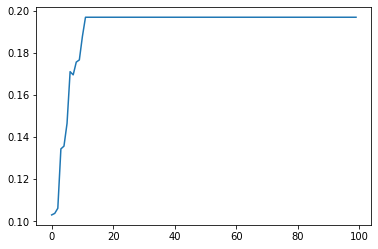

In [153]:
sns.lineplot(x = x[:100], y=p40_1[:100])


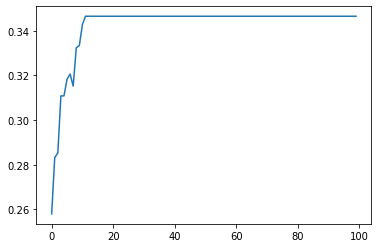

In [154]:
sns.lineplot(x = x[:100], y=p40_2[:100])

In [157]:
p40_1[10:20]

[0.1878922009885368,
 0.19700811979535404,
 0.19700811979535404,
 0.19700811979535404,
 0.19700811979535404,
 0.19700811979535404,
 0.19700811979535404,
 0.19700811979535404,
 0.19700811979535404,
 0.19700811979535404]

In [121]:
Pi['40']

[1.977216120698957,
 -0.24311020390094426,
 2.4601797801589202,
 -0.3030119429107812,
 -2.390195125522391]

In [119]:
Pi['40']

[1.6933005346338135,
 -0.5477904425490515,
 2.1449915609072407,
 -0.20501235987931424,
 -1.4417829105385682]

In [86]:
Pi['40']

[0.6263725473254517,
 3.34750891945878,
 1.0052244089773148,
 -0.9067279806989026,
 -1.1773731893203196]

In [87]:
Qa

{'Jumanji (1995)': [0.4253401093702947,
  0.3248328545357888,
  0.21038424717359505,
  0.2653826177858406,
  -0.11748340203352355],
 'Great Escape, The (1963)': [-0.15979890220670043,
  0.40376465780993226,
  1.442926127050881,
  1.0148154332059627,
  0.8798326256347841],
 'Force 10 from Navarone (1978)': [1.3590366029716776,
  -1.3007759962803844,
  0.7519138687895165,
  0.3435797763111842,
  -1.2440259131459273],
 'Ben-Hur (1959)': [-0.6923328132198107,
  0.2356406128983498,
  0.9262947297571987,
  -0.3129496930068106,
  0.6843615992522333],
 'Lord of the Flies (1963)': [0.039422315381585304,
  -0.144437653382605,
  0.08600252634581128,
  0.2762411319678852,
  0.7502940725901289],
 'Operation Dumbo Drop (1995)': [0.0840390133372608,
  0.8154986295861406,
  -0.6728221379056046,
  -0.39259690531255337,
  1.0004250153003234],
 'M*A*S*H (1970)': [0.6558929389371652,
  0.23424108699681445,
  0.5246688491842465,
  0.49307664049146716,
  0.9335903006654273],
 'Aces: Iron Eagle III (1992)': 

In [96]:
movies_sorted_by_1 = sorted([m for m in Qa], key = lambda x:Qa[x][2])

In [97]:
movies_sorted_by_1[:5]

['Heavy Metal (1981)',
 'Herbie Goes to Monte Carlo (1977)',
 'Seventh Seal, The (Sjunde inseglet, Det) (1957)',
 'Kiss the Girls (1997)',
 'Casino (1995)']

In [98]:
movies_sorted_by_1[-5:]

['Village of the Damned (1960)',
 "She's Gotta Have It (1986)",
 'Ideal Husband, An (1999)',
 'In & Out (1997)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)']

In [112]:
movies_sorted_by_2 = sorted([m for m in Qa], key = lambda x:Qa[x][])

In [113]:
movies_sorted_by_2[:5]

['Cocoon: The Return (1988)',
 'Ghost Dog: The Way of the Samurai (1999)',
 'Peeping Tom (1960)',
 'Deep Rising (1998)',
 'Home Alone 2: Lost in New York (1992)']

In [131]:
movies_sorted_by_3 = sorted([m for m in Qa], key = lambda x:Qa[x][4])

In [132]:
movies_sorted_by_3[:5]

['Cocoon: The Return (1988)',
 'Peeping Tom (1960)',
 'Ghost Dog: The Way of the Samurai (1999)',
 "She's Gotta Have It (1986)",
 'Deep Rising (1998)']